# Tanzania Water Wells

Stakeholder - Unicef
True Positive = well is faulty False Positive = predict well is faulty, when not faulty True Negative = well is not faulty False Negative - predict well is not faulty, when well is not faulty

## Business Problem
(business problem here)

## Data Overview

---------

In [1]:
#importing necessary libraries for eda
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [2]:
#displaying data
df = pd.read_csv('data/tanzania_wells.csv', index_col=0) 
display(df.head())
display(df.info())

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55765 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59400 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

None

In [3]:
#checking null values
df.isna().sum()

id                           0
amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

From the .info( ) can see that there are a lot of categorical variables - there are 31 of them. There are some columns such as `date_recorded` (when the row was entered) and `recorded_by` (group entering this row of the data). Looking at the data dictionary can see that some of these columns are duplicated. Lets take a closer look at the categorical features to see which ones we would like to keep. In general would to keep almost all features which are numerical since there are so few.

Columns that have null values are: 
- `funder`: who funded the well
- `installer`: organization that installed the well 
- `subvillage`: geographic location 
- `public_meeting`: true/false
- `scheme_management`: who operates the waterpoint 
- `scheme_name`: who operates the waterpoint 
- `permit`: if the waterpoint is permitted

## Exploratory Data Analysis and Visualizations

In [4]:
#let's take a look at status_group value counts for 
df['status_group'].value_counts()

functional                 32259
non functional             22824
functional needs repair     4317
Name: status_group, dtype: int64

There aren't many 'functional need repair' values so there is a big class imbalance. We can SMOTE but if we smote then we would have a lot of synthetic data. A 'non functional' well and a 'functional needs repair' well can be binned into the same category since 'functional needs repair' accounts for only 0.08% of the data. If we bin it with 'non functional' then will still predict the functionality of the well fairly accurate.

In [5]:
#binning status group into two categories
status_map = {
    'functional': 'functional',
    'non functional': 'non functional',
    'functional needs repair': 'non functional'
}

df['status_map'] = df['status_group'].map(status_map)

In [6]:
#sanity check
df['status_map'].value_counts()

functional        32259
non functional    27141
Name: status_map, dtype: int64

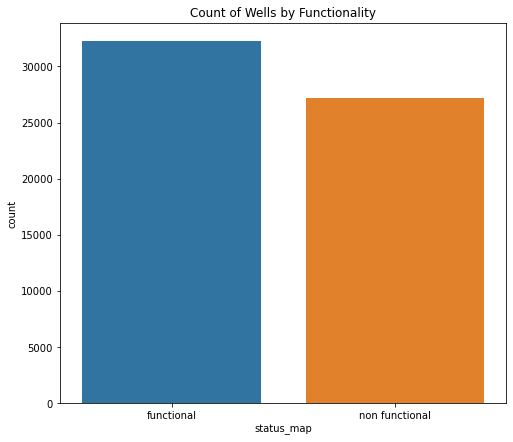

In [7]:
plt.figure(figsize=(8, 7))

sns.countplot(data=df,x='status_map')
plt.title('Count of Wells by Functionality');

In [8]:
 #amount_tsh
df['amount_tsh'].value_counts()

0.0         41639
500.0        3102
50.0         2472
1000.0       1488
20.0         1463
            ...  
8500.0          1
6300.0          1
220.0           1
138000.0        1
12.0            1
Name: amount_tsh, Length: 98, dtype: int64

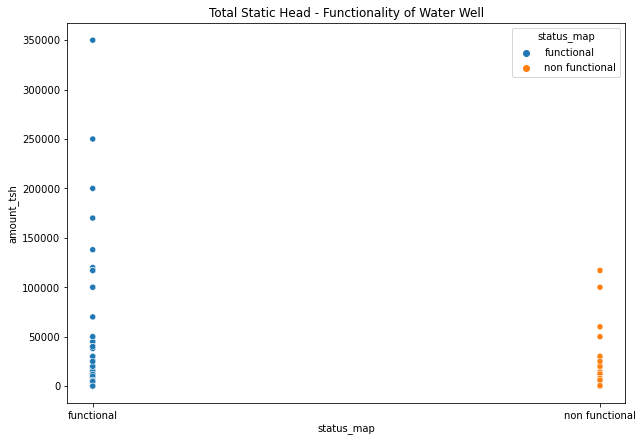

In [9]:
#plotting the relationship between the amount_tsh and status_group
plt.figure(figsize=(10,7))
sns.scatterplot(data= df, x='status_map', y='amount_tsh', hue='status_map') 
plt.title('Total Static Head - Functionality of Water Well');

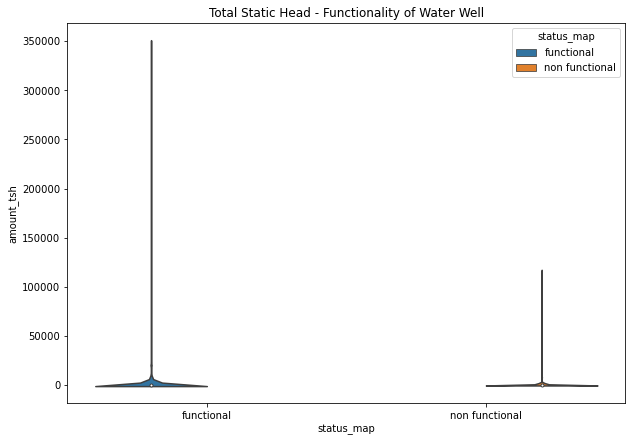

In [10]:
plt.figure(figsize=(10,7))
sns.violinplot(data= df, x='status_map', y='amount_tsh', hue='status_map') 
plt.title('Total Static Head - Functionality of Water Well');

Since there are a lot of 0 values in the `amount_tsh` feature the density in the violinplot and scatterplot can be show that there are alot of values near 0. 'functional' wells have a larger range than 'non functional' wells.

In [11]:
#displaying the value counts of funder and installer
print('--funder--')
display(df['funder'].value_counts())
print('--installer--')
display(df['installer'].value_counts())

--funder--


Government Of Tanzania    9084
Danida                    3114
Hesawa                    2202
Rwssp                     1374
World Bank                1349
                          ... 
Stephano Paulo               1
Cristan Outrich              1
Lusajo                       1
Daida                        1
Drwssp                       1
Name: funder, Length: 1897, dtype: int64

--installer--


DWE                         17402
Government                   1825
RWE                          1206
Commu                        1060
DANIDA                       1050
                            ...  
Altai Co. ltd                   1
Tanza                           1
S.P.C Pre-primary School        1
Dr.Matomola                     1
Pori la akiba kigosi            1
Name: installer, Length: 2145, dtype: int64

`funder` and `installer` have some similarities but are different enough to want to keep them both for visualizations. However, will most likely not keep in the final dataset used because there are too many unique values. 1897 unique values for funder and 2145 for installer 

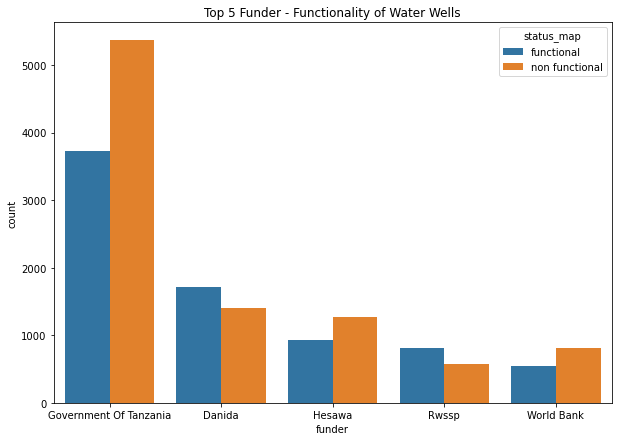

In [12]:
#plotting the relationship with the top 5 funder groups and status group
plt.figure(figsize=(10,7))
sns.countplot(data=df, x='funder', hue='status_map', order=df.funder.value_counts().iloc[:5].index)
plt.title('Top 5 Funder - Functionality of Water Wells');

The `funder` value Government of Tanzania  has the most 'functional' and 'non functional' wells with 3700 functioning and over 5000 non-functioning.

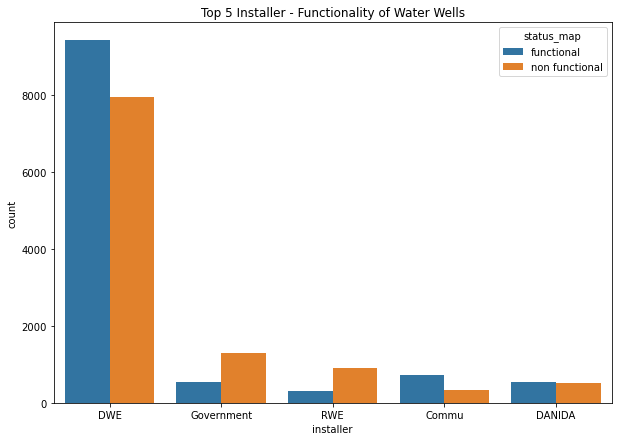

In [13]:
#plotting the relationship with the top 5 installer groups and status group
plt.figure(figsize=(10,7))
sns.countplot(data=df, x='installer', hue='status_map', order=df.installer.value_counts().iloc[:5].index) 
plt.title('Top 5 Installer - Functionality of Water Wells');

The `installer` DWE has the most 'functional' wells as well as the most 'non functional ones'. The values are well above the the next top installer Government.

In [14]:
#checking the values of gps_height
df['gps_height'].value_counts()

 0       20438
-15         60
-16         55
-13         55
-20         52
         ...  
 2285        1
 2424        1
 2552        1
 2413        1
 2385        1
Name: gps_height, Length: 2428, dtype: int64

Most of the values in `gps_height` are 0 this could mean that this at sea level so there are not
many alarm bells ringing right now.

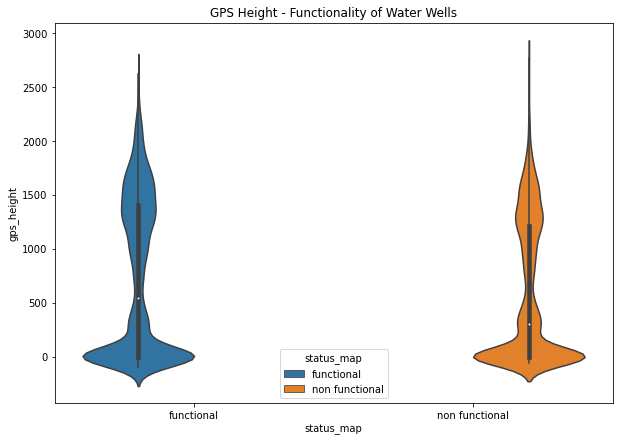

In [15]:
plt.figure(figsize=(10,7))
sns.violinplot(data=df, x='status_map', y='gps_height', hue='status_map')
plt.title('GPS Height - Functionality of Water Wells');

Looking at the violin plot can see that there is slightly more range with `gps_height` in the non functional status group. The medians are fairly similar with functional being slightly further up. There is also more frequency in functional group especially towards a higher `gps_height`.

In [16]:
#displaying the value counts of longitude and latitude
print('--longitude--')
display(df['longitude'].value_counts())
print('--latitude--')
display(df['latitude'].value_counts())

--longitude--


0.000000     1812
39.088875       2
39.105307       2
37.543401       2
38.180538       2
             ... 
38.710520       1
40.117029       1
34.672962       1
39.433604       1
34.890838       1
Name: longitude, Length: 57516, dtype: int64

--latitude--


-2.000000e-08    1812
-6.990549e+00       2
-2.489378e+00       2
-2.515321e+00       2
-6.963565e+00       2
                 ... 
-1.086099e+01       1
-3.149066e+00       1
-3.305834e+00       1
-9.076967e+00       1
-2.598965e+00       1
Name: latitude, Length: 57517, dtype: int64

Can see that there are placeholder value in longitude - 0.000000 and latitude - -2.000000e- 08. We will drop this rows since there are 1812 values that are missing. Only 0.03% of the dataset.

In [17]:
#dropping those values from the df
df = df[df['longitude'] != 0.000000]
df = df[df['latitude'] != -2.000000e-08]

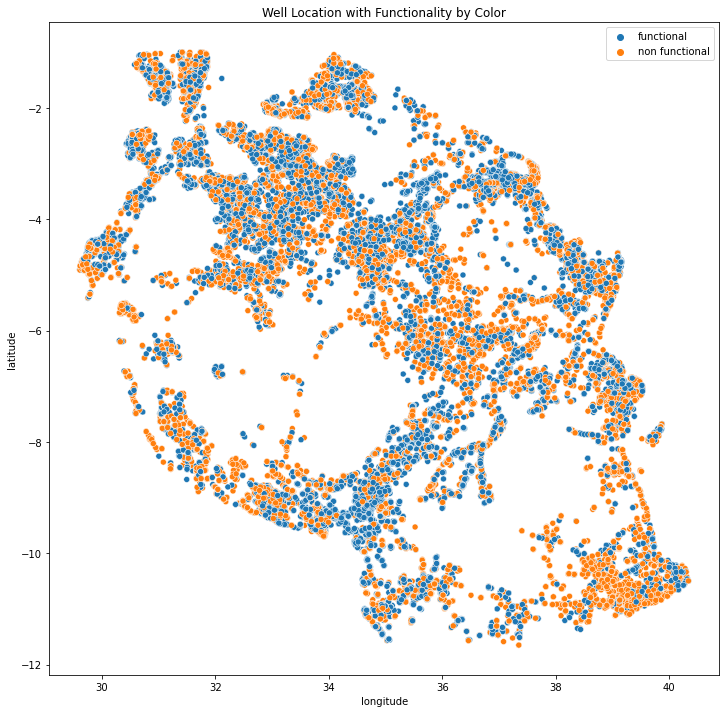

In [18]:
fig, ax = plt.subplots(figsize=(12,12))
sns.scatterplot(x='longitude', y='latitude', hue='status_map', data=df, ax=ax)
plt.title('Well Location with Functionality by Color')
plt.legend(fancybox=True);

There isn't a very distinct relationship between the `longitude` and `latitude` of the wells and their functionality. There is a more clustering of well (no matter their functionality) where ther are bigger cities in Tanzania. There are more 'non functional' wells in the south eastern part of the country.

In [19]:
#displaying the value counts of wpt_name
df['wpt_name'].value_counts()

none                3492
Shuleni             1734
Zahanati             814
Msikitini            533
Kanisani             322
                    ... 
Kwa Apaeli Saru        1
Kikurungo              1
Kwa Frank Mosha        1
Kwa Omari Rashid       1
Mhongolo               1
Name: wpt_name, Length: 36720, dtype: int64

The `wpt_name` doesn't really give much value to the modeling nor the EDA since these are just the names of the waterpoint. Will also drop `num_private` from the dataframe since it has no meaning in the data dictionary.

In [20]:
#displaying the value counts of basin
df['basin'].value_counts()

Pangani                    8940
Lake Victoria              8535
Rufiji                     7976
Internal                   7785
Lake Tanganyika            6333
Wami / Ruvu                5987
Lake Nyasa                 5085
Ruvuma / Southern Coast    4493
Lake Rukwa                 2454
Name: basin, dtype: int64

Want to keep this since it can be mapped for the modeling and can also make for good EDA.

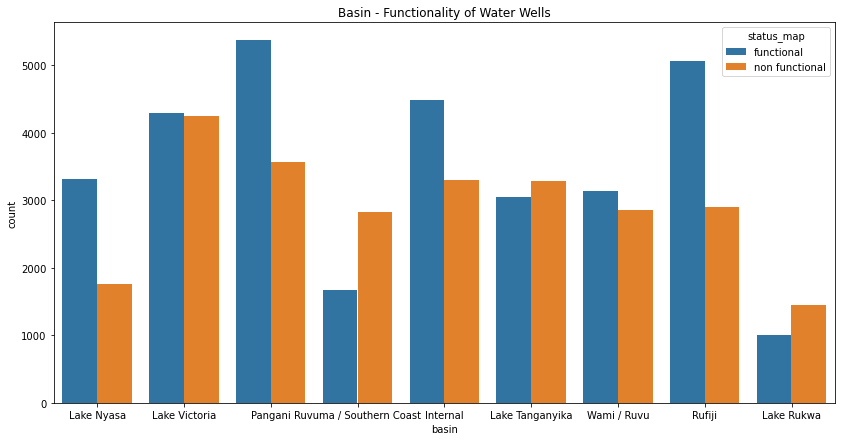

In [21]:
plt.figure(figsize=(14,7))
sns.countplot(data=df, x='basin', hue='status_map')
plt.title('Basin - Functionality of Water Wells');

From this chart can see that the `basin` Pangani has the most 'functional' wells with Rufiji coming in close second. Lake Victoria has the most 'non functiional' wells with Pangani coming in second. The basins that have the more 'non functional' well to 'functional' wells are Lake Rukwa and Ruvuma/Southern Coast.

In [22]:
#displaying the value counts of subvillage
df['subvillage'].value_counts()

Majengo     494
Shuleni     492
Madukani    435
Kati        366
Mtakuja     257
           ... 
Muembeni      1
Msale         1
Kamunya       1
Mvengi B      1
Nayosi        1
Name: subvillage, Length: 18567, dtype: int64

There are 18,567 unique values in `subvillage` not useful for modeling but can tell us something interesting in EDA. In the plot below will display the top 5 subvillages.

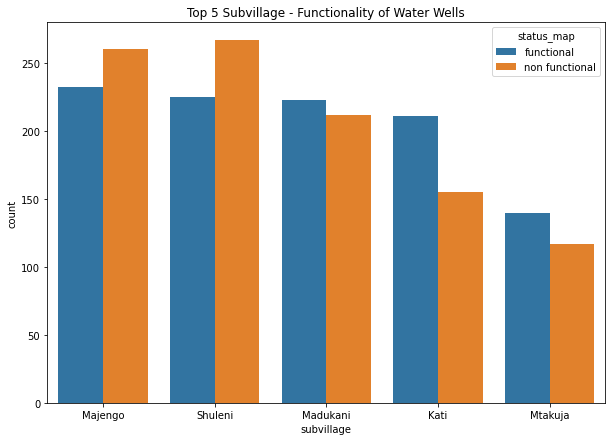

In [23]:
#plotting the relationship with the top 5 subvillages and status group
plt.figure(figsize=(10,7))
sns.countplot(data=df, x='subvillage', hue='status_map', order=df.subvillage.value_counts().iloc[:5].index)
plt.title('Top 5 Subvillage - Functionality of Water Wells');

The `subvillage` with the most 'functional' wells also have the most 'non functional' wells. The subvillage Kati has the better ratio between 'functional'and 'non functional'.

In [24]:
#displaying the value counts of region
df['region'].value_counts()

Iringa           5294
Mbeya            4639
Kilimanjaro      4379
Morogoro         4006
Shinyanga        3977
Arusha           3350
Kagera           3316
Kigoma           2816
Ruvuma           2640
Pwani            2635
Tanga            2547
Mwanza           2295
Dodoma           2201
Singida          2093
Mara             1969
Tabora           1959
Rukwa            1808
Mtwara           1730
Manyara          1583
Lindi            1546
Dar es Salaam     805
Name: region, dtype: int64

Want to keep this since it can be mapped for the modeling and can also make for good EDA.

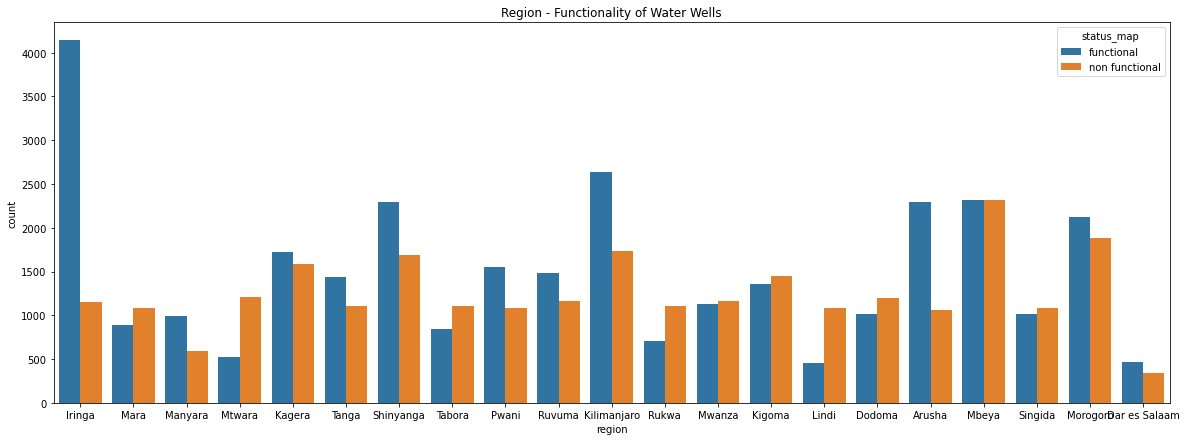

In [25]:
plt.figure(figsize=(20,7))
sns.countplot(data=df, x='region', hue='status_map')
plt.title('Region - Functionality of Water Wells');

Can see from this chart that the `region` Iringa has an overwhelmingly amount of the 'functional' wells with over 4000 of them. The region Kilmanjaro comes in second with a little under 3000. The region with with most 'non functional' wells is Mbeya with 2500.

In [26]:
#displaying the value counts of region_code and district_code
print('--region code--')
display(df['region_code'].value_counts())
print('--district code--')
display(df['district_code'].value_counts())

--region code--


11    5297
12    4639
3     4379
5     4040
17    3954
18    3324
2     3024
16    2816
10    2640
4     2513
19    2295
1     2201
13    2093
14    1979
20    1969
15    1808
6     1609
21    1583
80    1238
60    1025
90     917
7      805
99     423
9      390
24     326
8      300
40       1
Name: region_code, dtype: int64

--district code--


1     11146
2     10909
3      9998
4      8996
5      4356
6      3586
7      3343
8      1043
30      995
33      874
53      745
43      505
13      391
23      293
63      195
62      109
60       63
0        23
80       12
67        6
Name: district_code, dtype: int64

Will not keep this features since we do not which region and district are where with the code in the model but will make for interesting EDA will see the top 10 of each.

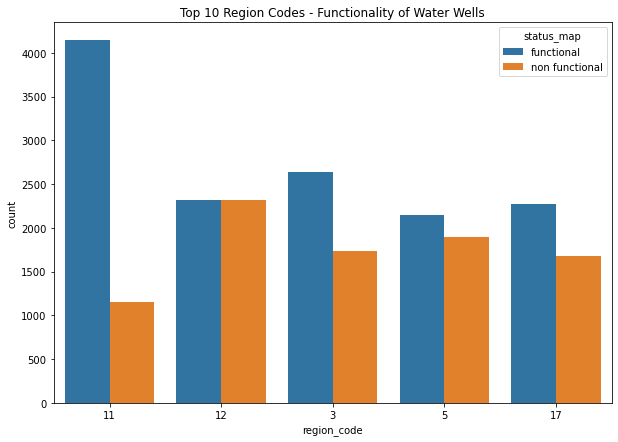

In [27]:
#plotting the relationship with the top 10 region_code and status group
plt.figure(figsize=(10,7))
sns.countplot(data=df, x='region_code', hue='status_map', order=df.region_code.value_counts().iloc[:5].index)
plt.title('Top 10 Region Codes - Functionality of Water Wells');

`region_code`11 has more 'functional' wells with a little bit over 4000. This matches with
`region` Iringa. The region_code 3 comes in second with a little over 2500. The region_code with the most 'non functional' wells is 12 around 1800 which matches the region Mbeya.

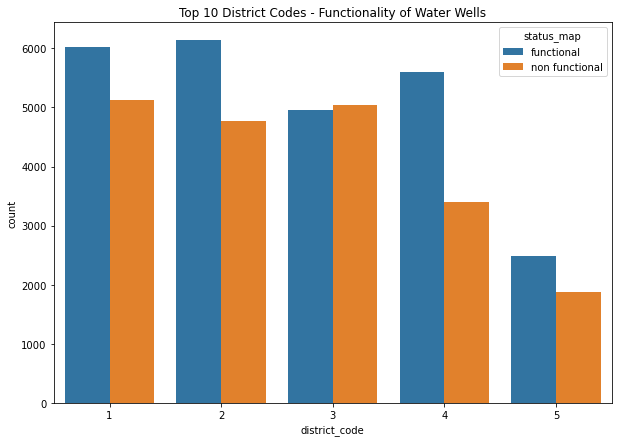

In [28]:
#plotting the relationship with the top 10 distict_code and status group
plt.figure(figsize=(10,7))
sns.countplot(data=df, x='district_code', hue='status_map', order=df.district_code .value_counts().iloc[:5].index)
plt.title('Top 10 District Codes - Functionality of Water Wells');

`distict_code` 2 has more 'functional' wells with a little bit over 6000. The district code 1 coming in close second at 6000. The district_code with the most 'non functional' wells is 1 around 5000.

In [29]:
#displaying the value counts of lga and ward - geographic location
print('--lga--')
display(df['lga'].value_counts())
print('--ward--')
display(df['ward'].value_counts())

--lga--


Njombe          2503
Arusha Rural    1252
Moshi Rural     1251
Rungwe          1106
Kilosa          1094
                ... 
Moshi Urban       79
Kigoma Urban      71
Arusha Urban      63
Lindi Urban       21
Nyamagana          1
Name: lga, Length: 124, dtype: int64

--ward--


Igosi              307
Imalinyi           252
Siha Kati          232
Mdandu             231
Nduruma            217
                  ... 
Burungura            1
Mkumbi               1
Nyamtinga            1
Uwanja wa Ndege      1
Thawi                1
Name: ward, Length: 2033, dtype: int64

There are 124 unique values in lga and 2033 in ward therefore not very good features for modeling but will make for interesting EDA. Will plot the top 5.

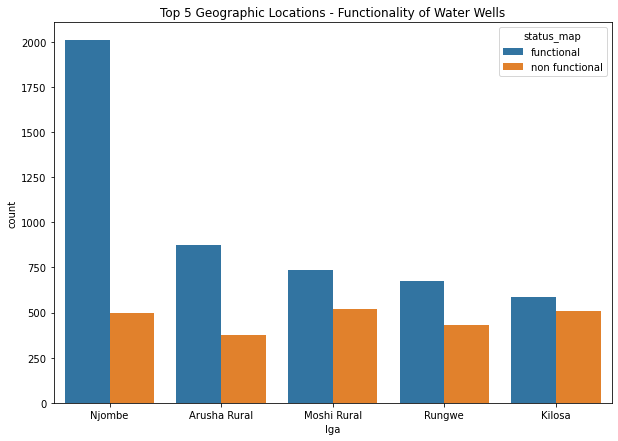

In [30]:
#plotting the relationship with the top 5 lga and status group
plt.figure(figsize=(10,7))
sns.countplot(data=df, x='lga', hue='status_map', order=df.lga.value_counts().iloc[:5].index)
plt.title('Top 5 Geographic Locations - Functionality of Water Wells');

An overwhelming amount of 'functional' wells in Njombe. The location with the most 'non functional' wells is Kilosa.

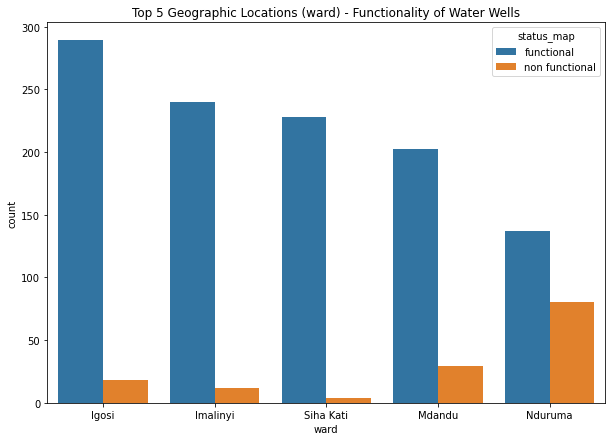

In [31]:
#plotting the relationship with the top 5 lga and status group
plt.figure(figsize=(10,7))
sns.countplot(data=df, x='ward', hue='status_map', order=df.ward.value_counts().iloc[:5].index) 
plt.title('Top 5 Geographic Locations (ward) - Functionality of Water Wells');

This is an interesting graph since there are not many 'non functional' wells in these geographic locations. Could be that there are more non functional wells in different ward but there are too many unique values.

In [32]:
#displaying the value counts of population
df['population'].value_counts()

0       19569
1        7025
200      1940
150      1892
250      1681
        ...  
3241        1
1960        1
1685        1
2248        1
1439        1
Name: population, Length: 1049, dtype: int64

There are many 0 values but this could mean that wells are far off from Tanzania residents. Let's take a further look.

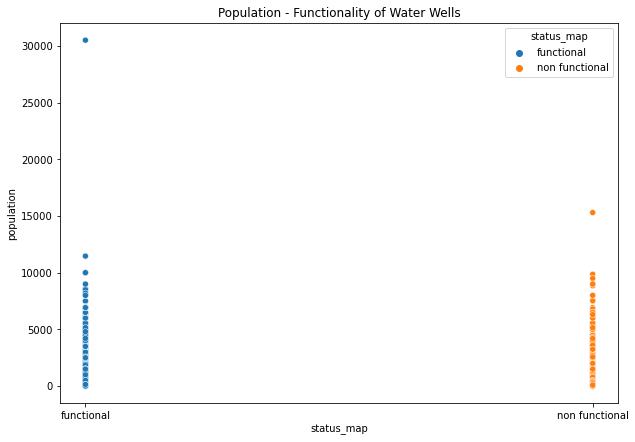

In [33]:
plt.figure(figsize=(10,7))
sns.scatterplot(data=df, x='status_map', y='population', hue='status_map')
plt.title('Population - Functionality of Water Wells');

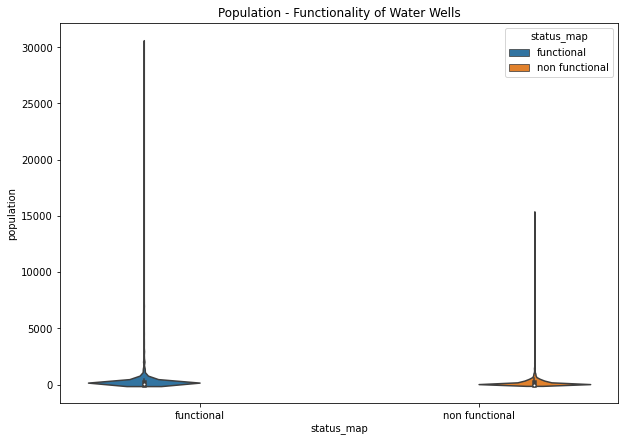

In [34]:
plt.figure(figsize=(10,7))
sns.violinplot(data=df, x='status_map', y='population', hue='status_map')
plt.title('Population - Functionality of Water Wells');

These graphs don't tell us much since there are so many values equal to 0 but can see there is a larger range in 'functional' wells.

In [35]:
#displaying the value counts of permit
df['public_meeting'].value_counts()

True     49737
False     4875
Name: public_meeting, dtype: int64

There are some null values. Will not use in modeling but let's plot it to see its relationship with well functionality

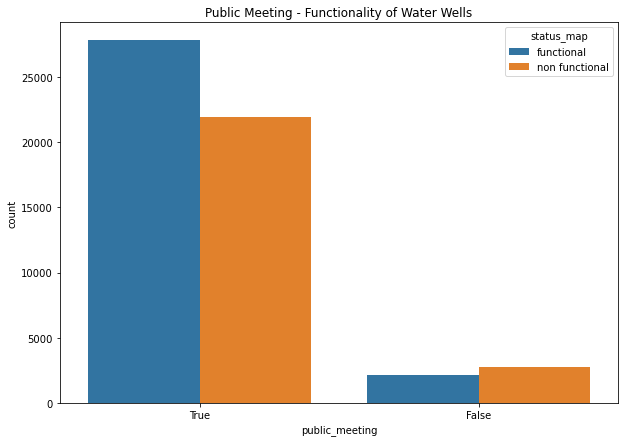

In [36]:
plt.figure(figsize=(10,7))
sns.countplot(data=df, x='public_meeting', hue='status_map')
plt.title('Public Meeting - Functionality of Water Wells');

The relationship between `public_meeting` and functionality seems like if there is a public meeting the more known about the functionality of the well which makes sense. This is not very insightful for modeling so will drop.

In [37]:
#displaying the value counts of scheme_name
df['scheme_name'].value_counts()

K                    682
None                 644
Borehole             418
Chalinze wate        405
M                    400
                    ... 
Manonga                1
Kungwa W               1
Mweka                  1
Chalinze Wate          1
Zahanati pipeline      1
Name: scheme_name, Length: 2658, dtype: int64

Will not keep this feature since there are too many missing values and `scheme management` according to the data dictionary has the same values.

In [38]:
#displaying the value counts of scheme_management
df['scheme_management'].value_counts()

VWC                 36143
WUG                  4249
Water authority      3151
WUA                  2882
Water Board          2747
Parastatal           1607
Private operator     1063
Company              1061
Other                 765
SWC                    97
Trust                  72
None                    1
Name: scheme_management, dtype: int64

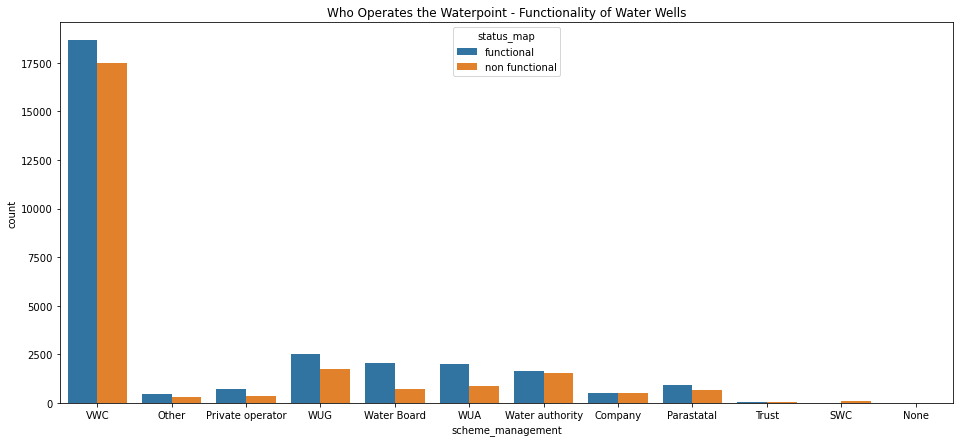

In [39]:
plt.figure(figsize=(16,7))
sns.countplot(data=df, x='scheme_management', hue='status_map')
plt.title('Who Operates the Waterpoint - Functionality of Water Wells');

WWC overwhelmingly operates the waterpoints but this doesn't tell us much since it operates more than it will also have the most 'functional' and 'non functional'.

In [40]:
#displaying the value counts of permit
df['permit'].value_counts()

True     38100
False    16432
Name: permit, dtype: int64

There is a good amount of values which are null in `permit` but seems like a very telling feature will keep and see how it relates with status groups.

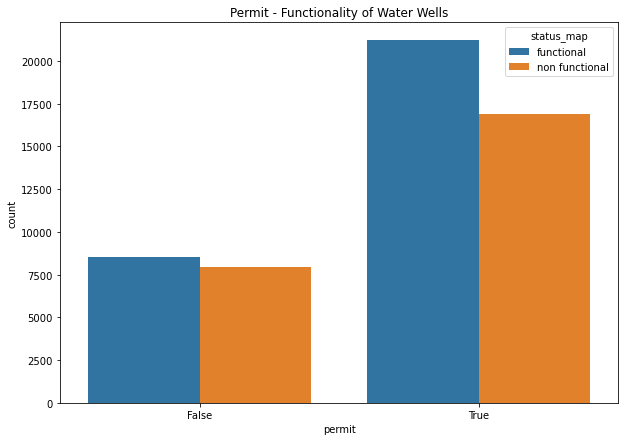

In [41]:
plt.figure(figsize=(10,7))
sns.countplot(data=df, x='permit', hue='status_map')
plt.title('Permit - Functionality of Water Wells');

If the waterpoint is permitted the wells tend to be more 'functional'. There is more of gap between the 'functional' and 'non functional' wells when the permit is equal to true. This could be a good indicator as to the functionality of the wells.

In [42]:
#displaying the value counts of construction_year
df['construction_year'].value_counts()

0       18897
2010     2645
2008     2613
2009     2533
2000     2091
2007     1587
2006     1471
2003     1286
2011     1256
2004     1123
2012     1084
2002     1075
1978     1037
1995     1014
2005     1011
1999      979
1998      966
1990      954
1985      945
1980      811
1996      811
1984      779
1982      744
1994      738
1972      708
1974      676
1997      644
1992      640
1993      608
2001      540
1988      521
1983      488
1975      437
1986      434
1976      414
1970      411
1991      324
1989      316
1987      302
1981      238
1977      202
1979      192
1973      184
2013      176
1971      145
1960      102
1967       88
1963       85
1968       77
1969       59
1964       40
1962       30
1961       21
1965       19
1966       17
Name: construction_year, dtype: int64

There are a lot of zeros will take the median to impute these values but will have to do this later. Let's look at the top 10 disregarding the 0.

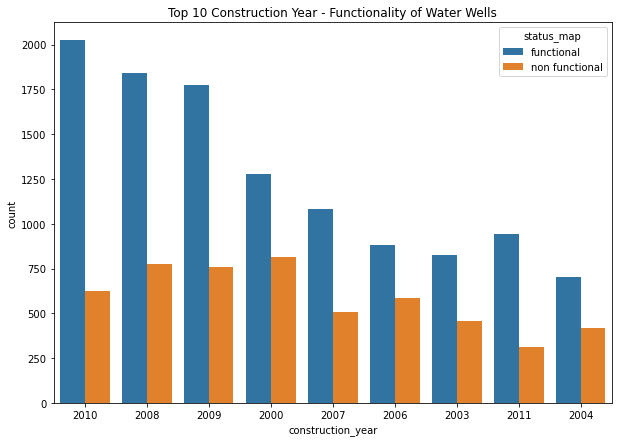

In [43]:
#plotting the relationship with the top 5 lga and status group
plt.figure(figsize=(10,7))
sns.countplot(data=df, x='construction_year', hue='status_map', order=df.construction_year.value_counts().iloc[1:10].index)
plt.title('Top 10 Construction Year - Functionality of Water Wells');

The wells that are more functional are the ones that were constructed within the years of 2009 through 2010. They have the better ratio of 'non functional' and 'functional needs repair' as well. The year with the least 'functional' wells is 2004.

In [44]:
#displaying the value counts of extraction_type, extraction_type_group and extraction_type_class
print('--extraction_type--')
display(df['extraction_type'].value_counts())
print('--extraction_type_group--')
display(df['extraction_type_group'].value_counts())
print('--extraction_type_class--')
display(df['extraction_type_class'].value_counts())

--extraction_type--


gravity                      26696
nira/tanira                   7361
other                         6160
submersible                   4688
swn 80                        3448
mono                          2817
india mark ii                 2284
afridev                       1659
ksb                           1358
other - rope pump              451
other - swn 81                 229
windmill                       117
india mark iii                  91
cemo                            90
other - play pump               85
climax                          32
walimi                          20
other - mkulima/shinyanga        2
Name: extraction_type, dtype: int64

--extraction_type_group--


gravity            26696
nira/tanira         7361
other               6160
submersible         6046
swn 80              3448
mono                2817
india mark ii       2284
afridev             1659
rope pump            451
other handpump       336
other motorpump      122
wind-powered         117
india mark iii        91
Name: extraction_type_group, dtype: int64

--extraction_type_class--


gravity         26696
handpump        15179
other            6160
submersible      6046
motorpump        2939
rope pump         451
wind-powered      117
Name: extraction_type_class, dtype: int64

These features `extraction_type`, `extraction_type_group`, and `extraction_type_class` are the same just less specific as you go down. We decided it was best to use `extraction_type_class` as to not have too many columns when OneHotEncoding.

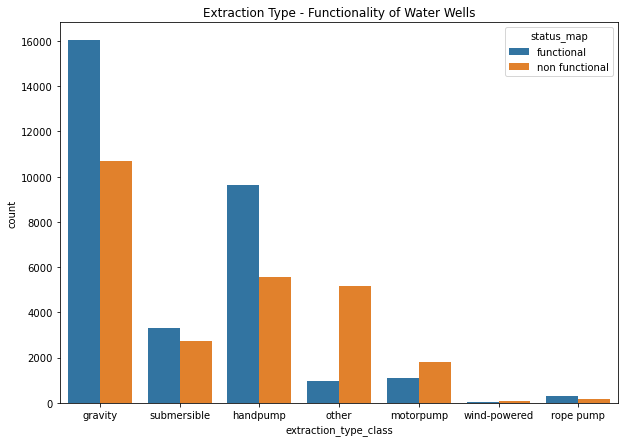

In [45]:
plt.figure(figsize=(10,7))
sns.countplot(data=df, x='extraction_type_class', hue='status_map')
plt.title('Extraction Type - Functionality of Water Wells');

The kind of extraction the waterpoint uses, `extraction_type_class` , that has the most 'functional' wells is gravity at 16,000. It has a good amount 'non functional' wells but it has a better ratio of the functionality of the wells than handpump which has the second most 'functional wells' at 10,000.

In [46]:
#displaying the value counts of management, and management_group
print('--management--')
display(df['management'].value_counts())
print('--management_group--')
display(df['management_group'].value_counts())

--management--


vwc                 39746
wug                  5556
water board          2932
wua                  2533
private operator     1970
parastatal           1696
water authority       902
other                 840
company               685
unknown               551
other - school         99
trust                  78
Name: management, dtype: int64

--management_group--


user-group    50767
commercial     3635
parastatal     1696
other           939
unknown         551
Name: management_group, dtype: int64

Will keep `management` since it has a better breakdown of the management. Will also drop `scheme_management` since it has the same values as it but it is not as specific. Management is a happy medium.

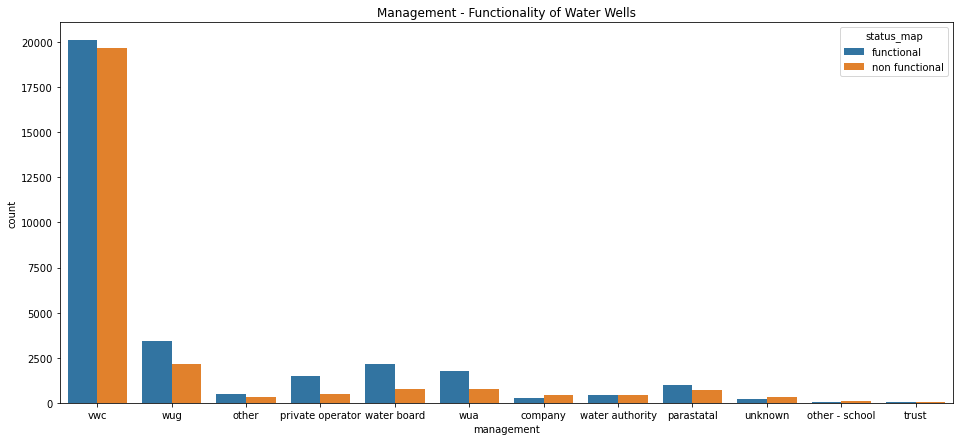

In [47]:
plt.figure(figsize=(16,7))
sns.countplot(data=df, x='management', hue='status_map')
plt.title('Management - Functionality of Water Wells');

The `management` value wwc manages the most wells so it makes sense that it has the most 'functional'and 'non functional' wells. This doesn't really give us groundbreaking information but might be useful to keep and is the better of the other two which give the same information.

In [48]:
#displaying the value counts of payment, and payment_type
print('--payment--')
display(df['payment'].value_counts())
print('--payment_type--')
display(df['payment_type'].value_counts())

--payment--


never pay                24380
pay per bucket            8953
pay monthly               8229
unknown                   7654
pay when scheme fails     3843
pay annually              3626
other                      903
Name: payment, dtype: int64

--payment_type--


never pay     24380
per bucket     8953
monthly        8229
unknown        7654
on failure     3843
annually       3626
other           903
Name: payment_type, dtype: int64

They features have the same value but we decided to keep the `payment_type` just since it is more succint in the wording of its values.

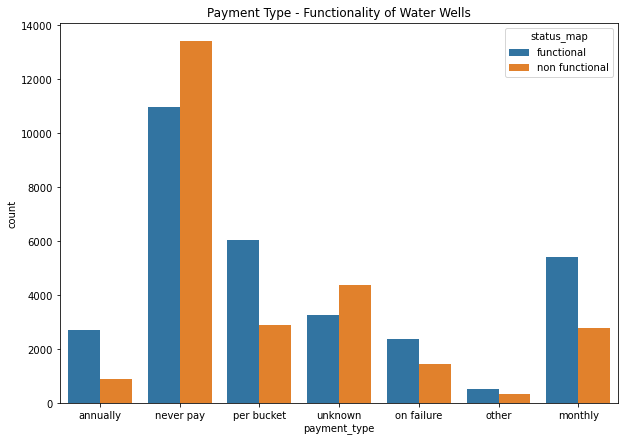

In [49]:
plt.figure(figsize=(10,7))
sns.countplot(data=df, x='payment_type', hue='status_map')
plt.title('Payment Type - Functionality of Water Wells');

The `payment_type` value has never pay has the most the 'functional'and 'non functional' wells with 'non functional' surpassing the 'functional' wells with a under 14,000. The `payment_type` per bucket and monthly have the better ratios with the functionality of the wells.

In [50]:
#displaying the value counts of water_quality, and quality_group
print('--water_quality--')
display(df['water_quality'].value_counts())
print('--quality_group--')
display(df['quality_group'].value_counts())

--water_quality--


soft                  49431
salty                  4772
unknown                1661
milky                   803
coloured                479
salty abandoned         228
fluoride                199
fluoride abandoned       15
Name: water_quality, dtype: int64

--quality_group--


good        49431
salty        5000
unknown      1661
milky         803
colored       479
fluoride      214
Name: quality_group, dtype: int64

Since the feature are the same and basically have the same values then we are going with `quality_group` since it has a pretty good breakdown of the water quality although not as specific as `water_quality`. Those values that are not in quality_group don't have too many values.

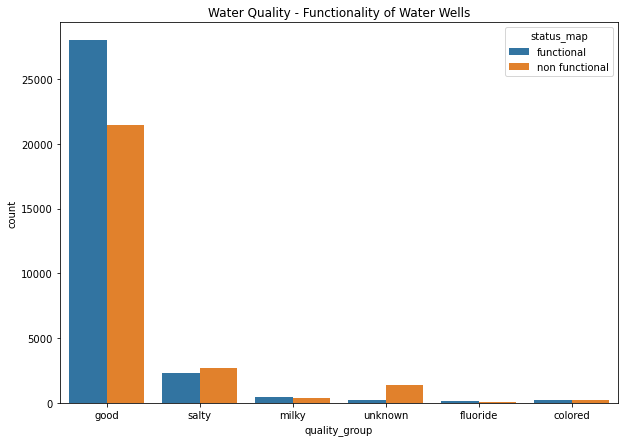

In [51]:
plt.figure(figsize=(10,7))
sns.countplot(data=df, x='quality_group', hue='status_map')
plt.title('Water Quality - Functionality of Water Wells');

There are more of the good values for `quality_group` with both 'functional'and 'non functional' wells.

In [52]:
#displaying the value counts of quantity, and quantity_group
print('--quantity--')
display(df['quantity'].value_counts())
print('--quantity_group--')
display(df['quantity_group'].value_counts())

--quantity--


enough          32260
insufficient    14564
dry              5990
seasonal         4001
unknown           773
Name: quantity, dtype: int64

--quantity_group--


enough          32260
insufficient    14564
dry              5990
seasonal         4001
unknown           773
Name: quantity_group, dtype: int64

The features have the same values will just arbritarily keep `quanitity` and drop the other.

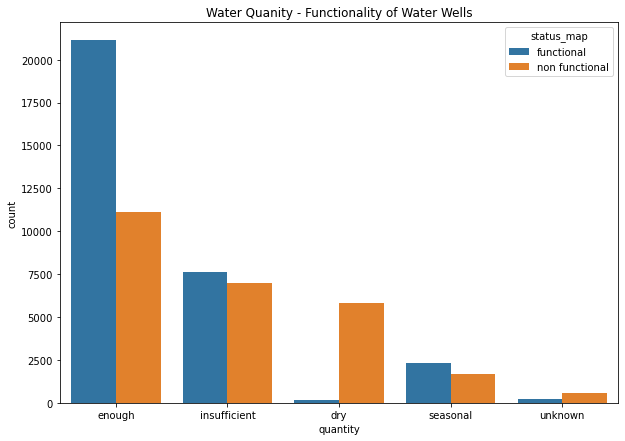

In [53]:
plt.figure(figsize=(10,7))
sns.countplot(data=df, x='quantity', hue='status_map')
plt.title('Water Quanity - Functionality of Water Wells');

The `quantity` value enough has most 'functional'and  'non functional'wells. It also has better ratio with the functionality unlike insufficient and dry; however it makes makes sense why their status group would be overwhelmingly 'non functional'

In [54]:
#displaying the value counts of source, source_type and source_class
print('--source--')
display(df['source'].value_counts())
print('--source_type--')
display(df['source_type'].value_counts())
print('--source_class--')
display(df['source_class'].value_counts())

--source--


spring                  17006
shallow well            15499
machine dbh             10826
river                    9612
rainwater harvesting     2218
hand dtw                  873
dam                       649
lake                      639
other                     202
unknown                    64
Name: source, dtype: int64

--source_type--


spring                  17006
shallow well            15499
borehole                11699
river/lake              10251
rainwater harvesting     2218
dam                       649
other                     266
Name: source_type, dtype: int64

--source_class--


groundwater    44204
surface        13118
unknown          266
Name: source_class, dtype: int64

Will keep `source_type` since it is a happy medium between `source` which is too specific and `source_class` which isn't specific enough.

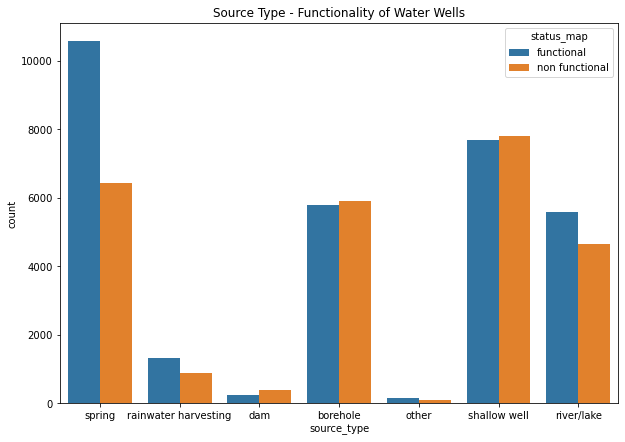

In [55]:
plt.figure(figsize=(10,7))
sns.countplot(data=df, x='source_type', hue='status_map')
plt.title('Source Type - Functionality of Water Wells');

The `source_type` with the most 'functional' wells is spring with more than 10,000 wells. Shallow wells comes in second with a little under 8000 wells. Shallow wells also has the most 'non functional' wells at 8000 with borehole coming in second.

In [56]:
#displaying the value counts of waterpoint_type, and waterpoint_type_group
print('--waterpoint_type--')
display(df['waterpoint_type'].value_counts())
print('--waterpoint_type_group--')
display(df['waterpoint_type_group'].value_counts())

--waterpoint_type--


communal standpipe             28375
hand pump                      16181
other                           6167
communal standpipe multiple     5959
improved spring                  783
cattle trough                    116
dam                                7
Name: waterpoint_type, dtype: int64

--waterpoint_type_group--


communal standpipe    34334
hand pump             16181
other                  6167
improved spring         783
cattle trough           116
dam                       7
Name: waterpoint_type_group, dtype: int64

We decided to keep `waterpoint_type` instead of `waterpoint_type_group` because we preferred the specificity it provided especially since there are a significant amount of values in difference between values communal standpipe and communal standpipe multiple.

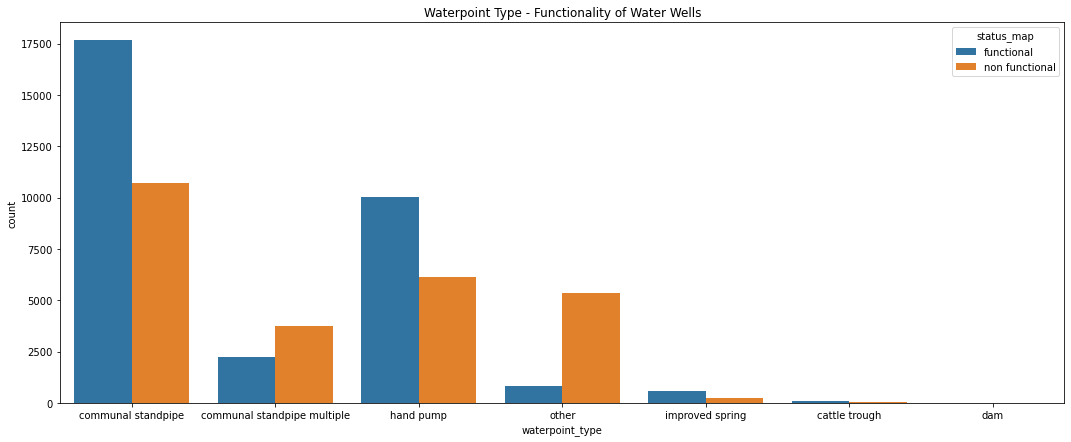

In [57]:
plt.figure(figsize=(18,7))
sns.countplot(data=df, x='waterpoint_type', hue='status_map')
plt.title('Waterpoint Type - Functionality of Water Wells');

Can see from this chart that the value communal standpipe has the most 'functional' wells at 17,500 with hand pump coming in second at over 10,000. The communal standpipe also has the most 'non-functional' wells with (once again) hand pump coming in second.

## Mapping the Categorical Variables

`basin`:
- Pangani                    
- Lake Victoria              
- Rufiji                     
- Internal                   
- Lake Tanganyika            
- Wami / Ruvu                
- Lake Nyasa                 
- Ruvuma / Southern Coast    
- Lake Rukwa 

`region`:
- Iringa           
- Mbeya            
- Kilimanjaro      
- Morogoro         
- Shinyanga        
- Arusha           
- Kagera           
- Kigoma           
- Ruvuma           
- Pwani            
- Tanga            
- Mwanza           
- Dodoma           
- Singida          
- Mara             
- Tabora           
- Rukwa            
- Mtwara           
- Manyara          
- Lindi            
- Dar es Salaam 

`permit`:
- True
- False

`extraction_type_class`:
- gravity         
- handpump        
- other            
- submersible      
- motorpump        
- rope pump         
- wind-powered  

`managment`:
- vwc                 
- wug                  
- water board          
- wua                  
- private operator      
- parastatal           
- water authority       
- other                 
- company               
- unknown               
- other - school         
- trust  

`payment_type`:
- never pay     
- per bucket     
- monthly        
- unknown        
- on failure     
- annually       
- other           

`quality_group`:
- good        
- salty        
- unknown      
- milky         
- colored       
- fluoride


`quantity`
- enough          
- insufficient    
- dry              
- seasonal         
- unknown

`source_type`
- spring                  
- shallow well            
- borehole                
- river/lake              
- rainwater harvesting     
- dam                       
- other

`waterpoint_type`
- communal standpipe             
- hand pump                      
- other                           
- communal standpipe multiple     
- improved spring                  
- cattle trough                    
- dam 

`status_map`
- functional
- non functional

In [58]:
#mapping basin map
basin_map = {
    'Lake Victoria': 0, 
    'Pangani': 1,
    'Rufiji': 2,
    'Internal': 3,
    'Lake Tanganyika': 4,
    'Wami / Ruvu': 5,
    'Lake Nyasa': 6,
    'Ruvuma / Southern Coast': 7,
    'Lake Rukwa': 8}

#adding in to df
df['basin_num'] = df['basin'].map(basin_map)

In [59]:
#mapping region
region_map = {
    'Iringa': 0, 
    'Shinyanga': 1,
    'Mbeya': 2,
    'Kilimanjaro': 3,
    'Morogoro': 4,
    'Arusha': 5,
    'Kagera': 6,
    'Mwanza': 7,
    'Kigoma': 8,
    'Ruvuma': 9,
    'Pwani': 10,
    'Tanga': 11,
    'Dodoma': 12,
    'Singida': 13,
    'Mara': 14,
    'Tabora': 15,
    'Rukwa': 16,
    'Mtwara': 17,
    'Manyara': 18,
    'Lindi': 19,
    'Dar es Salaam': 20}

#adding in to df
df['region_num'] = df['region'].map(region_map)

In [60]:
#mapping permit
permit_map = {
    False: 0,
    True: 1}

#adding in to df
df['permit_num'] = df['permit'].map(permit_map)

In [61]:
#mapping extraction_type_class
extraction_map = { 
    'gravity': 0,
    'handpump': 1,
    'other': 2,
    'submersible': 3,
    'motorpump': 4,
    'rope pump': 5,
    'wind-powered': 6}

#adding in to df
df['extraction_num'] = df['extraction_type_class'].map(extraction_map)

In [62]:
#mapping management
management_map = {
    'vwc': 0, 
    'wug': 1, 
    'water board': 2, 
    'wua': 3, 
    'private operator':4, 
    'parastatal': 5, 
    'water authority': 6, 
    'other':7, 
    'company': 8, 
    'unknown':9, 
    'other - school':10, 
    'trust':11}

#adding in to df
df['management_num'] = df['management'].map(management_map)

In [63]:
#mapping payment_type
payment_map = {
    'never pay': 0,
    'per bucket': 1,
    'monthly': 2,
    'unknown': 3, 
    'on failure': 4,
    'annually': 5,
    'other': 6}

#adding in to df
df['payment_num'] = df['payment_type'].map(payment_map)

In [64]:
#mapping quality_group
quality_group_map = {
    'good':1, 
    'salty':2, 
    'unknown':3, 
    'milky':4, 
    'colored':5,
    'fluoride': 6} 


#adding in to df
df['qualtiy_group_num'] = df['quality_group'].map(quality_group_map)

In [65]:
#mapping quality_map
quantity_map = {
    'enough':0, 
    'insufficient':1, 
    'dry':2, 
    'seasonal':3, 
    'unknown':4}


#adding in to df
df['quantity_num'] = df['quantity'].map(quantity_map)

In [66]:
# mapping of source_type
source_type_map = {
    'spring':0, 
    'shallow well':1, 
    'borehole':2, 
    'river/lake':3, 
    'rainwater harvesting': 4,
    'dam': 5,
    'other': 6}

#adding in to df                   
df['source_type_num'] = df['source_type'].map(source_type_map)

In [67]:
# mapping of waterpoint_type
waterpoint_type_map = {
    'communal standpipe':0, 
    'hand pump':1, 
    'other':2, 
    'communal standpipe multiple': 3,
    'improved spring':4, 
    'cattle trough':5, 
    'dam':6}

#adding in to df
df['waterpoint_type_num'] = df['waterpoint_type'].map(waterpoint_type_map)

In [68]:
#mapping status_map
status_group_map = {
    'functional': 0, 
    'non functional': 1}

#adding in to df
df['status_group_num'] = df['status_map'].map(status_group_map)

In [69]:
df.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,region_num,permit_num,extraction_num,management_num,payment_num,qualtiy_group_num,quantity_num,source_type_num,waterpoint_type_num,status_group_num
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,0,0.0,0,0,5,1,0,0,0,0
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,14,1.0,0,1,0,1,1,4,0,0
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,18,1.0,0,0,1,1,0,5,3,0
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,17,1.0,3,0,0,1,2,2,3,1
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,6,1.0,0,7,0,1,3,4,0,0


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57588 entries, 0 to 59399
Data columns (total 53 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     57588 non-null  int64  
 1   amount_tsh             57588 non-null  float64
 2   date_recorded          57588 non-null  object 
 3   funder                 53966 non-null  object 
 4   gps_height             57588 non-null  int64  
 5   installer              53952 non-null  object 
 6   longitude              57588 non-null  float64
 7   latitude               57588 non-null  float64
 8   wpt_name               57588 non-null  object 
 9   num_private            57588 non-null  int64  
 10  basin                  57588 non-null  object 
 11  subvillage             57217 non-null  object 
 12  region                 57588 non-null  object 
 13  region_code            57588 non-null  int64  
 14  district_code          57588 non-null  int64  
 15  lg

In [71]:
#making a copy 
water_wells = df.copy()

#dropping the unecessary columns
water_wells.drop(columns=['id', 'date_recorded', 'funder', 'installer', 'wpt_name', 'num_private', 'basin', 
                          'subvillage', 'region', 'lga', 'ward', 'public_meeting', 'recorded_by', 'scheme_management', 
                          'permit', 'scheme_name', 'extraction_type', 'extraction_type_group', 'extraction_type_class', 
                          'management', 'management_group', 'payment', 'payment_type', 'water_quality', 'quality_group', 
                          'quantity', 'quantity_group', 'source', 'source_type', 'source_class', 'waterpoint_type', 
                          'waterpoint_type_group', 'status_group', 'status_map'], inplace=True)

#sanity check
water_wells.head()

,amount_tsh,gps_height,longitude,latitude,region_code,district_code,population,construction_year,basin_num,region_num,permit_num,extraction_num,management_num,payment_num,qualtiy_group_num,quantity_num,source_type_num,waterpoint_type_num,status_group_num
0,6000.0,1390,34.938093,-9.856322,11,5,109,1999,6,0,0.0,0,0,5,1,0,0,0,0
1,0.0,1399,34.698766,-2.147466,20,2,280,2010,0,14,1.0,0,1,0,1,1,4,0,0
2,25.0,686,37.460664,-3.821329,21,4,250,2009,1,18,1.0,0,0,1,1,0,5,3,0
3,0.0,263,38.486161,-11.155298,90,63,58,1986,7,17,1.0,3,0,0,1,2,2,3,1
4,0.0,0,31.130847,-1.825359,18,1,0,0,0,6,1.0,0,7,0,1,3,4,0,0


In [73]:
#checking null values
water_wells.isna().sum()

amount_tsh                0
gps_height                0
longitude                 0
latitude                  0
region_code               0
district_code             0
population                0
construction_year         0
basin_num                 0
region_num                0
permit_num             3056
extraction_num            0
management_num            0
payment_num               0
qualtiy_group_num         0
quantity_num              0
source_type_num           0
waterpoint_type_num       0
status_group_num          0
dtype: int64

In [74]:
#dropping the null rows of permit 
water_wells.dropna(subset=['permit_num'], inplace=True)

#sanity check
water_wells['permit_num'].isna().sum()

0

In [90]:
#only getting the values which are not equal to zero
construct = water_wells.loc[water_wells['construction_year'] != 0]

#median construction year
median = construct['construction_year'].median()
print(f"Median: {median}")

#replacing the 0 values with the median for construction_year 
water_wells['construction_year'] = water_wells['construction_year'].replace(0, median)

#sanity check
water_wells['construction_year'].value_counts().iloc[:5].index

Median: 2000.0


Int64Index([2000, 2008, 2009, 2010, 2007], dtype='int64')

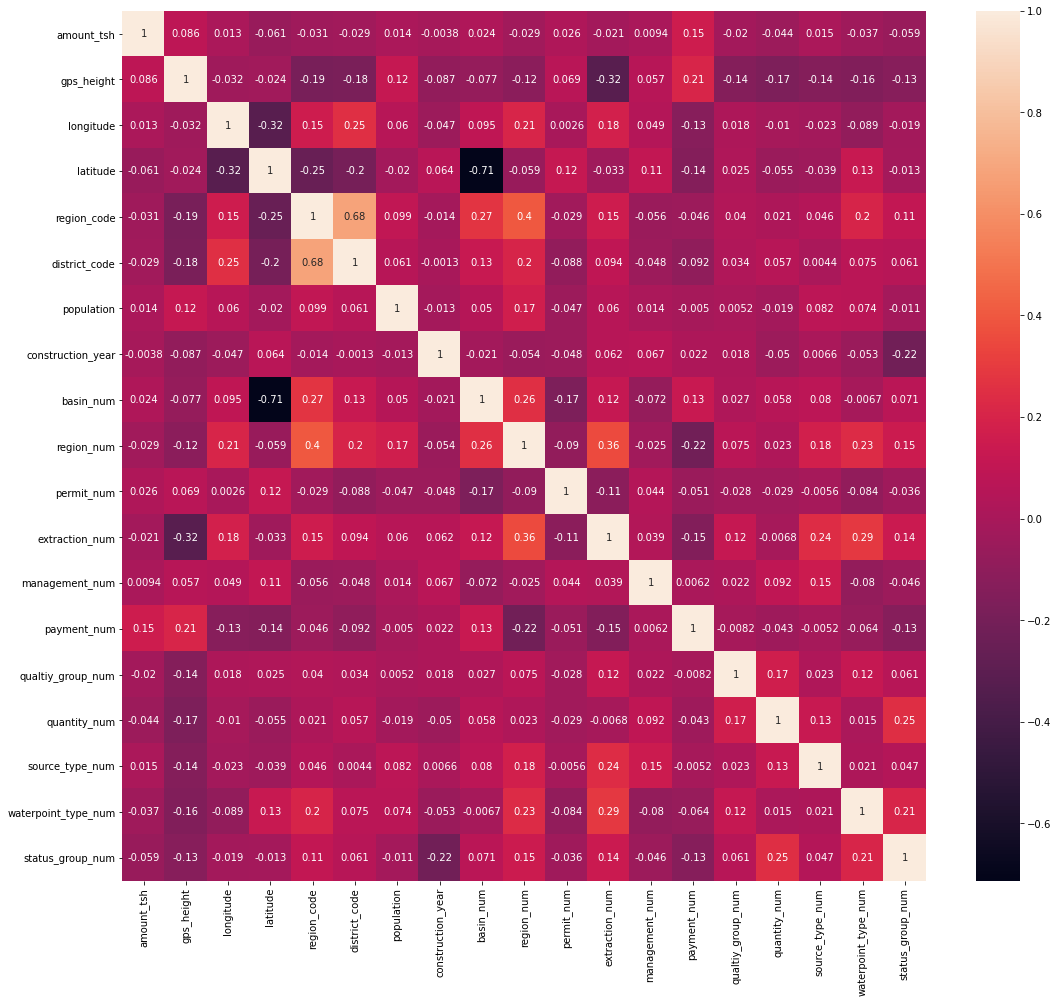

In [91]:
#correlation heatmap
plt.figure(figsize=(18,16))
sns.heatmap(water_wells.corr(), annot=True)
plt.show()

From this correlation heat map can that the features that have the highest positive correlation with `status_group_num` are:
- `region_code` = 0.11
- `extraction_num` = 0.14
- `region_num` = 0.15
- `waterpoint_type_num` = 0.21
- `quantity_num` = 0.25

highest negative correlation:
- `payment_num` = -0.13
- `gps_height` = -0.13
- `construction_year` = -0.22

## Train Test Split

In [92]:
from sklearn.model_selection import train_test_split

#X and y values
X = water_wells.drop('status_group_num', axis=1)
y = water_wells['status_group_num']

#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)